# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
import numpy as np

class RandomSampler():
    
    def __init__(self, vars):
        """Accepts definition of the set of variables to be sampled.
            
            Params:
                vars (list of lists): each item is a list containing:
                                        item 0 - either 'discrete', 'continuous-int' or 'continuous-float'
                                        items 1-N depend on the value of item 0:
                                        if discrete, then these are the set of values to be chosen from
                                        if continuous then these are the min & max bounds of the range
        """
        
        self.vars = vars
        
        self.rng = np.random.default_rng()
    
    
    def sample(self):
        """Draws a random sample of all variables at its disposal.
        
            Returns a list of values in the order of definition.
        """

        rtn = []
        for v in self.vars:
            if v[0] == "discrete":
                choice = self.rng.integers(low=1, high=len(v), size=1)[0]
                rtn.append(v[choice])
                
            elif v[0] == "continuous-int":
                choice = self.rng.integers(low=v[1], high=v[2], size=1)[0]
                rtn.append(choice)
                
            elif v[0] == "continuous-float":
                choice = self.rng.random() * (v[2]-v[1]) + v[1]
                rtn.append(choice)
            
            else:
                print("///// RandomSampler error:  unknown type ", v[0])
            
        return rtn
                
vars = [["discrete", 88, 66, 11, 22, 33, 44, 99, 101, 77],
        ["discrete", 500], #1-item list
        ["continuous-int", 43, 44], #1-item range
        ["continuous-int", 0, 10],
        ["continuous-float", 0.0, 1.0],
        ["continuous-float", -3.3, 0.0],
        ["continuous-float", -1.0, 6.4],
       ]
rs = RandomSampler(vars)

for i in range(3):
    out = rs.sample()
    print("\n", i, "\n", out)



 0 
 [44, 500, 43, 6, 0.3102526904468593, -1.5851605188398867, 2.604359133588234]

 1 
 [101, 500, 43, 6, 0.5739166582586482, -1.1477799403319495, 2.1637241910411364]

 2 
 [33, 500, 43, 5, 0.7428833542649877, -2.1864595449581414, 0.627632631409901]


Ready to train M35 over 30 training sets for 15001 episodes each, with fixed params:
    Max episodes  =  15001
    Weight decay  =  0.0
    Gamma         =  0.99
    Buf prime size=  5000

///// Beginning training set  M35.00  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999931
      Noise scale      = 0.053
      LR actor         = 0.000040
      LR critic        = 0.000025
      Learning every      8  time steps
      Learn iterations =  4
      Tau              = 0.00176
      Seed             =  44939
2000	Average score:   0.025,        mem:   1861/   404 (21.7%), avg 1.0 eps/min; ???   
4000	Average score:   0.023,        mem:   3760/   825 (21.9%), avg 1.0 eps/min; ???   
5269	Running avg/max: 0.027/0.200,  mem:   4999/  1116 (22.3%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6065/  1127 (18.6%), avg 980.2 eps/min;  0.2 hr rem

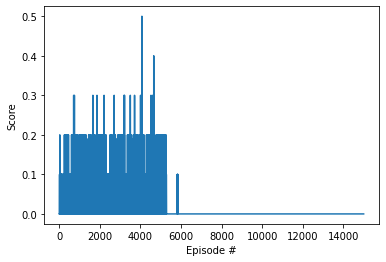


///// Beginning training set  M35.01  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999976
      Noise scale      = 0.038
      LR actor         = 0.000057
      LR critic        = 0.000002
      Learning every      2  time steps
      Learn iterations =  4
      Tau              = 0.00251
      Seed             =  44939
2000	Average score:   0.027,        mem:   2008/   452 (22.5%), avg 1.0 eps/min; ???   
4000	Average score:   0.031,        mem:   3848/   871 (22.6%), avg 1.0 eps/min; ???   
5271	Running avg/max: 0.020/0.300,  mem:   5000/  1119 (22.4%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6069/  1123 (18.5%), avg 518.4 eps/min;  0.3 hr rem   
7654	Running avg/max: 0.000/0.000,  mem:   8435/  1123 (13.3%), avg 524.2 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8955/  1123 (12.5%), avg 522.3 eps/min

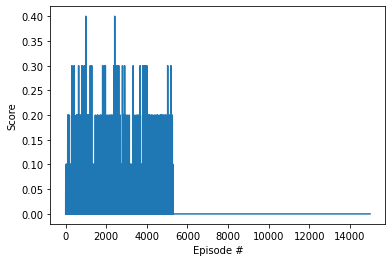


///// Beginning training set  M35.02  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999929
      Noise scale      = 0.046
      LR actor         = 0.000044
      LR critic        = 0.000008
      Learning every      6  time steps
      Learn iterations =  4
      Tau              = 0.00194
      Seed             =  44939
2000	Average score:   0.037,        mem:   1934/   394 (20.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.016,        mem:   3844/   822 (21.4%), avg 1.0 eps/min; ???   
5254	Running avg/max: 0.020/0.200,  mem:   5000/  1082 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6094/  1082 (17.8%), avg 646.7 eps/min;  0.2 hr rem   
6046	Running avg/max: 0.000/0.000,  mem:   6156/  1082 (17.6%), avg 650.8 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8982/  1082 (12.0%), avg 658.8 eps/min

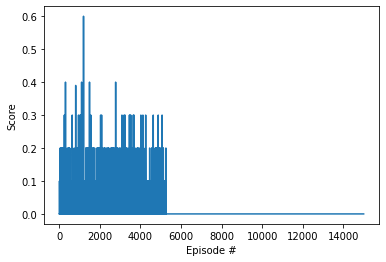


///// Beginning training set  M35.03  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999957
      Noise scale      = 0.036
      LR actor         = 0.000025
      LR critic        = 0.000020
      Learning every      4  time steps
      Learn iterations =  2
      Tau              = 0.00177
      Seed             =  44939
2000	Average score:   0.021,        mem:   1947/   422 (21.7%), avg 1.0 eps/min; ???   
4000	Average score:   0.029,        mem:   3820/   867 (22.7%), avg 1.0 eps/min; ???   
5186	Running avg/max: 0.019/0.200,  mem:   5000/  1144 (22.9%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6210/  1148 (18.5%), avg 874.6 eps/min;  0.2 hr rem   
6493	Running avg/max: 0.000/0.000,  mem:   6898/  1148 (16.6%), avg 881.9 eps/min   
* noise mult = 0.2
8000	Average score:   0.004,        mem:   9519/  1257 (13.2%), avg 814.6 eps/min

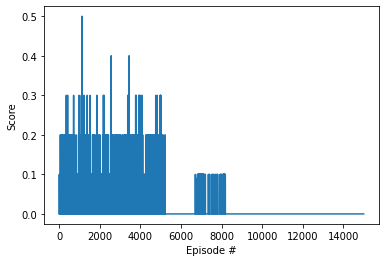


///// Beginning training set  M35.04  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999984
      Noise scale      = 0.041
      LR actor         = 0.000038
      LR critic        = 0.000003
      Learning every      7  time steps
      Learn iterations =  1
      Tau              = 0.00229
      Seed             =  44939
2000	Average score:   0.024,        mem:   1928/   368 (19.1%), avg 1.0 eps/min; ???   
4000	Average score:   0.025,        mem:   3817/   809 (21.2%), avg 1.0 eps/min; ???   
5253	Running avg/max: 0.026/0.200,  mem:   4999/  1070 (21.4%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6105/  1073 (17.6%), avg 1056.6 eps/min;  0.1 hr rem   
8000	Average score:   0.020,        mem:   9487/  1191 (12.6%), avg 994.4 eps/min;  0.1 hr rem   
8300	Running avg/max: 0.020/0.100,  mem:  10170/  1251 (12.3%), avg 962.4 eps/min   
*

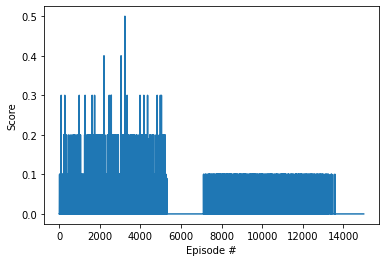


///// Beginning training set  M35.05  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999931
      Noise scale      = 0.050
      LR actor         = 0.000047
      LR critic        = 0.000002
      Learning every      1  time steps
      Learn iterations =  2
      Tau              = 0.00233
      Seed             =  44939
2000	Average score:   0.028,        mem:   1908/   407 (21.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.023,        mem:   3743/   823 (22.0%), avg 1.0 eps/min; ???   
5334	Running avg/max: 0.021/0.200,  mem:   5000/  1118 (22.4%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   5986/  1119 (18.7%), avg 538.2 eps/min;  0.3 hr rem   
6146	Running avg/max: 0.000/0.000,  mem:   6184/  1119 (18.1%), avg 545.1 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8864/  1119 (12.6%), avg 555.2 eps/min

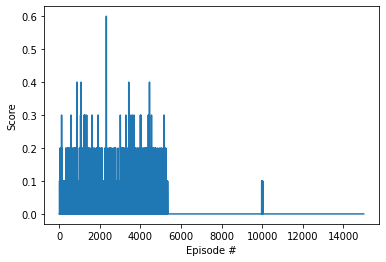


///// Beginning training set  M35.06  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999988
      Noise scale      = 0.041
      LR actor         = 0.000072
      LR critic        = 0.000022
      Learning every      8  time steps
      Learn iterations =  3
      Tau              = 0.00232
      Seed             =  44939
2000	Average score:   0.015,        mem:   1884/   369 (19.6%), avg 1.0 eps/min; ???   
4000	Average score:   0.018,        mem:   3727/   764 (20.5%), avg 1.0 eps/min; ???   
5289	Running avg/max: 0.023/0.400,  mem:   5000/  1057 (21.1%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6030/  1059 (17.6%), avg 761.2 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   8923/  1059 (11.9%), avg 780.6 eps/min;  0.1 hr rem   
10000	Average score:   0.000,        mem:  11751/  1059 ( 9.0%), avg 780.7 eps/min;  0.

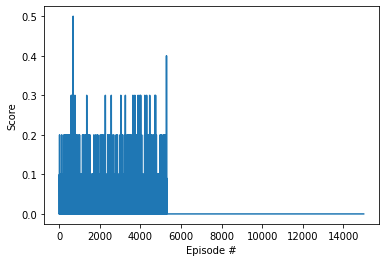


///// Beginning training set  M35.07  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999937
      Noise scale      = 0.054
      LR actor         = 0.000039
      LR critic        = 0.000010
      Learning every      3  time steps
      Learn iterations =  3
      Tau              = 0.00189
      Seed             =  44939
2000	Average score:   0.018,        mem:   1883/   377 (20.0%), avg 1.0 eps/min; ???   
4000	Average score:   0.014,        mem:   3770/   795 (21.1%), avg 1.0 eps/min; ???   
5303	Running avg/max: 0.027/0.400,  mem:   5001/  1081 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6009/  1083 (18.0%), avg 466.6 eps/min;  0.3 hr rem   
6197	Running avg/max: 0.000/0.000,  mem:   6288/  1083 (17.2%), avg 472.4 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8949/  1101 (12.3%), avg 479.8 eps/min

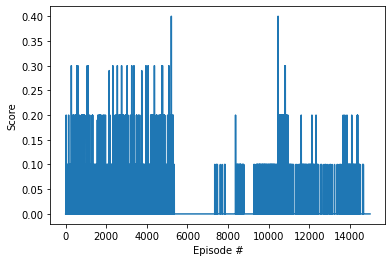


///// Beginning training set  M35.08  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999936
      Noise scale      = 0.037
      LR actor         = 0.000012
      LR critic        = 0.000026
      Learning every      9  time steps
      Learn iterations =  2
      Tau              = 0.00233
      Seed             =  44939
2000	Average score:   0.021,        mem:   1846/   394 (21.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.024,        mem:   3721/   846 (22.7%), avg 1.0 eps/min; ???   
5350	Running avg/max: 0.021/0.300,  mem:   4998/  1120 (22.4%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6082/  1133 (18.6%), avg 1083.8 eps/min;  0.1 hr rem   
6135	Running avg/max: 0.000/0.000,  mem:   6265/  1133 (18.1%), avg 1111.8 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8967/  1133 (12.6%), avg 1149.6 eps/

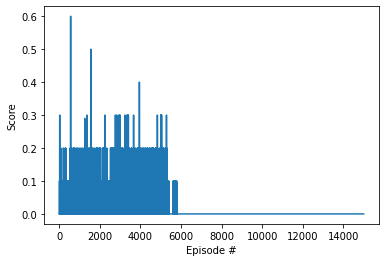


///// Beginning training set  M35.09  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999929
      Noise scale      = 0.039
      LR actor         = 0.000026
      LR critic        = 0.000022
      Learning every      8  time steps
      Learn iterations =  3
      Tau              = 0.00197
      Seed             =  44939
2000	Average score:   0.018,        mem:   1932/   421 (21.8%), avg 1.0 eps/min; ???   
4000	Average score:   0.018,        mem:   3798/   847 (22.3%), avg 1.0 eps/min; ???   
5368	Running avg/max: 0.020/0.200,  mem:   5000/  1089 (21.8%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.023,        mem:   6046/  1125 (18.6%), avg 808.3 eps/min;  0.2 hr rem   
6077	Running avg/max: 0.004/0.100,  mem:   6190/  1129 (18.2%), avg 791.2 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8958/  1131 (12.6%), avg 924.3 eps/min

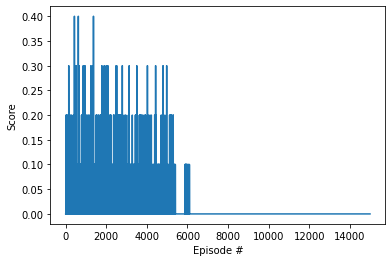


///// Beginning training set  M35.10  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999992
      Noise scale      = 0.053
      LR actor         = 0.000047
      LR critic        = 0.000015
      Learning every      3  time steps
      Learn iterations =  2
      Tau              = 0.00202
      Seed             =  44939
2000	Average score:   0.018,        mem:   1910/   392 (20.5%), avg 1.0 eps/min; ???   
4000	Average score:   0.019,        mem:   3803/   800 (21.0%), avg 1.0 eps/min; ???   
5231	Running avg/max: 0.026/0.300,  mem:   5000/  1086 (21.7%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6104/  1089 (17.8%), avg 669.7 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   9092/  1126 (12.4%), avg 650.2 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:  11980/  1132 ( 9.4%), avg 665.8 eps/min;  0.

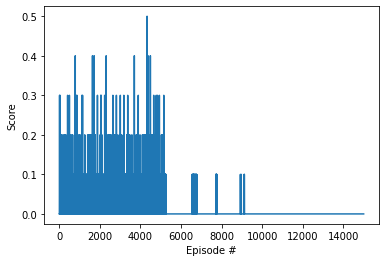


///// Beginning training set  M35.11  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999951
      Noise scale      = 0.047
      LR actor         = 0.000043
      LR critic        = 0.000005
      Learning every      3  time steps
      Learn iterations =  4
      Tau              = 0.00240
      Seed             =  44939
2000	Average score:   0.016,        mem:   1931/   394 (20.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.021,        mem:   3806/   812 (21.3%), avg 1.0 eps/min; ???   
5258	Running avg/max: 0.022/0.300,  mem:   4994/  1091 (21.8%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6086/  1097 (18.0%), avg 419.4 eps/min;  0.4 hr rem   
6414	Running avg/max: 0.000/0.000,  mem:   6664/  1097 (16.5%), avg 428.1 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8977/  1104 (12.3%), avg 428.8 eps/min

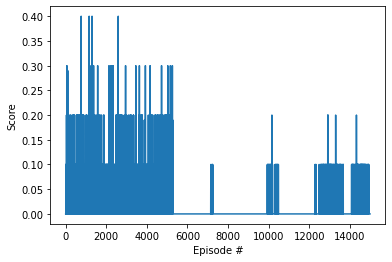


///// Beginning training set  M35.12  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999997
      Noise scale      = 0.043
      LR actor         = 0.000020
      LR critic        = 0.000001
      Learning every      8  time steps
      Learn iterations =  4
      Tau              = 0.00200
      Seed             =  44939
2000	Average score:   0.023,        mem:   1935/   374 (19.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.022,        mem:   3874/   815 (21.0%), avg 1.0 eps/min; ???   
5196	Running avg/max: 0.021/0.300,  mem:   5000/  1057 (21.1%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6166/  1061 (17.2%), avg 721.4 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   9076/  1061 (11.7%), avg 733.7 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:  11937/  1061 ( 8.9%), avg 732.6 eps/min;  0.

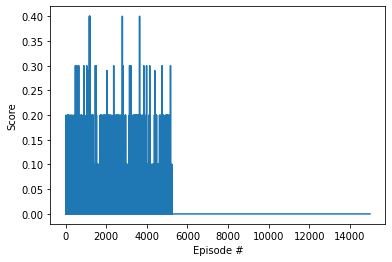


///// Beginning training set  M35.13  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999961
      Noise scale      = 0.036
      LR actor         = 0.000014
      LR critic        = 0.000026
      Learning every      8  time steps
      Learn iterations =  2
      Tau              = 0.00229
      Seed             =  44939
2000	Average score:   0.015,        mem:   1933/   374 (19.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.015,        mem:   3827/   804 (21.0%), avg 1.0 eps/min; ???   
5245	Running avg/max: 0.022/0.200,  mem:   4999/  1052 (21.0%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6161/  1057 (17.2%), avg 981.1 eps/min;  0.2 hr rem   
6635	Running avg/max: 0.000/0.000,  mem:   7063/  1057 (15.0%), avg 987.5 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9053/  1057 (11.7%), avg 992.9 eps/min

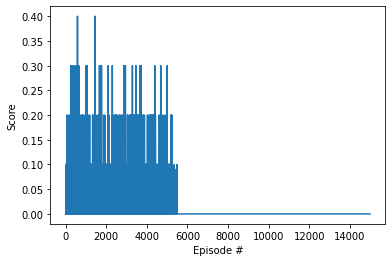


///// Beginning training set  M35.14  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999948
      Noise scale      = 0.043
      LR actor         = 0.000050
      LR critic        = 0.000014
      Learning every      1  time steps
      Learn iterations =  4
      Tau              = 0.00206
      Seed             =  44939
2000	Average score:   0.034,        mem:   1880/   417 (22.2%), avg 1.0 eps/min; ???   
4000	Average score:   0.017,        mem:   3750/   822 (21.9%), avg 1.0 eps/min; ???   
5299	Running avg/max: 0.026/0.300,  mem:   4999/  1111 (22.2%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6010/  1111 (18.5%), avg 376.7 eps/min;  0.4 hr rem   
6383	Running avg/max: 0.000/0.000,  mem:   6549/  1111 (17.0%), avg 373.5 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8904/  1111 (12.5%), avg 375.6 eps/min

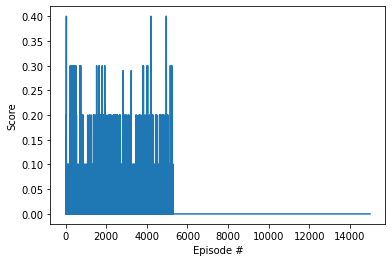


///// Beginning training set  M35.15  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999979
      Noise scale      = 0.046
      LR actor         = 0.000055
      LR critic        = 0.000009
      Learning every      4  time steps
      Learn iterations =  1
      Tau              = 0.00261
      Seed             =  44939
2000	Average score:   0.022,        mem:   1899/   405 (21.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.026,        mem:   3779/   845 (22.4%), avg 1.0 eps/min; ???   
5385	Running avg/max: 0.014/0.200,  mem:   4998/  1127 (22.5%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   5872/  1127 (19.2%), avg 1240.7 eps/min;  0.1 hr rem   
8000	Average score:   0.003,        mem:   8815/  1136 (12.9%), avg 1225.2 eps/min;  0.1 hr rem   
8037	Running avg/max: 0.002/0.100,  mem:   8876/  1137 (12.8%), avg 1225.8 eps/min   

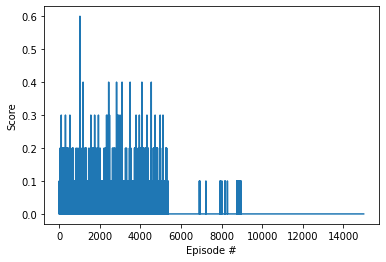


///// Beginning training set  M35.16  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999988
      Noise scale      = 0.049
      LR actor         = 0.000021
      LR critic        = 0.000019
      Learning every      5  time steps
      Learn iterations =  3
      Tau              = 0.00241
      Seed             =  44939
2000	Average score:   0.014,        mem:   1907/   370 (19.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.023,        mem:   3769/   766 (20.3%), avg 1.0 eps/min; ???   
5299	Running avg/max: 0.022/0.200,  mem:   4996/  1064 (21.3%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6015/  1065 (17.7%), avg 680.6 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:   8903/  1065 (12.0%), avg 701.1 eps/min;  0.2 hr rem   
10000	Average score:   0.000,        mem:  11758/  1065 ( 9.1%), avg 705.4 eps/min;  0.

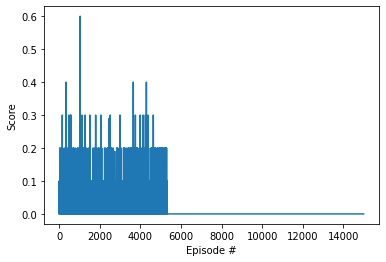


///// Beginning training set  M35.17  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999963
      Noise scale      = 0.044
      LR actor         = 0.000072
      LR critic        = 0.000029
      Learning every      4  time steps
      Learn iterations =  4
      Tau              = 0.00195
      Seed             =  44939
2000	Average score:   0.020,        mem:   1820/   343 (18.8%), avg 1.0 eps/min; ???   
4000	Average score:   0.036,        mem:   3742/   777 (20.8%), avg 1.0 eps/min; ???   
5360	Running avg/max: 0.013/0.200,  mem:   4999/  1050 (21.0%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.008,        mem:   5964/  1071 (18.0%), avg 503.7 eps/min;  0.3 hr rem   
6884	Running avg/max: 0.000/0.000,  mem:   7253/  1071 (14.8%), avg 514.5 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8845/  1071 (12.1%), avg 519.6 eps/min

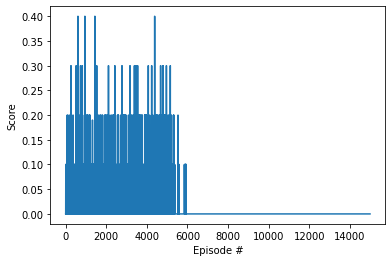


///// Beginning training set  M35.18  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999967
      Noise scale      = 0.040
      LR actor         = 0.000034
      LR critic        = 0.000008
      Learning every      7  time steps
      Learn iterations =  4
      Tau              = 0.00235
      Seed             =  44939
2000	Average score:   0.020,        mem:   1921/   399 (20.8%), avg 1.0 eps/min; ???   
4000	Average score:   0.029,        mem:   3788/   798 (21.1%), avg 1.0 eps/min; ???   
5190	Running avg/max: 0.030/0.200,  mem:   5000/  1104 (22.1%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6168/  1105 (17.9%), avg 936.1 eps/min;  0.2 hr rem   
6872	Running avg/max: 0.000/0.000,  mem:   7411/  1105 (14.9%), avg 938.3 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9071/  1105 (12.2%), avg 940.0 eps/min

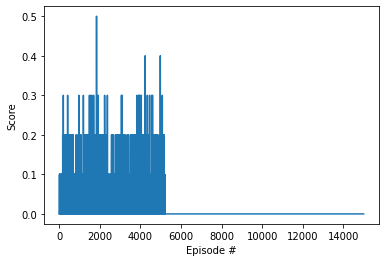


///// Beginning training set  M35.19  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999944
      Noise scale      = 0.040
      LR actor         = 0.000052
      LR critic        = 0.000024
      Learning every      2  time steps
      Learn iterations =  1
      Tau              = 0.00224
      Seed             =  44939
2000	Average score:   0.020,        mem:   1926/   392 (20.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.019,        mem:   3731/   782 (21.0%), avg 1.0 eps/min; ???   
5310	Running avg/max: 0.022/0.200,  mem:   5000/  1088 (21.8%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6004/  1090 (18.2%), avg 828.8 eps/min;  0.2 hr rem   
6304	Running avg/max: 0.000/0.000,  mem:   6437/  1090 (16.9%), avg 832.2 eps/min   
* noise mult = 0.2
8000	Average score:   0.005,        mem:   8934/  1107 (12.4%), avg 837.9 eps/min

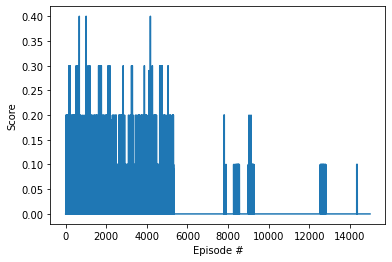


///// Beginning training set  M35.20  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999958
      Noise scale      = 0.045
      LR actor         = 0.000042
      LR critic        = 0.000023
      Learning every      7  time steps
      Learn iterations =  2
      Tau              = 0.00186
      Seed             =  44939
2000	Average score:   0.027,        mem:   1951/   434 (22.2%), avg 1.0 eps/min; ???   
4000	Average score:   0.027,        mem:   3911/   888 (22.7%), avg 1.0 eps/min; ???   
5196	Running avg/max: 0.015/0.100,  mem:   4999/  1143 (22.9%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6206/  1150 (18.5%), avg 1031.4 eps/min;  0.1 hr rem   
6507	Running avg/max: 0.000/0.000,  mem:   6907/  1150 (16.6%), avg 1077.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9079/  1150 (12.7%), avg 1120.1 eps/

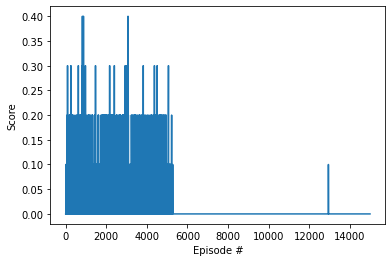


///// Beginning training set  M35.21  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999956
      Noise scale      = 0.045
      LR actor         = 0.000080
      LR critic        = 0.000015
      Learning every      7  time steps
      Learn iterations =  4
      Tau              = 0.00238
      Seed             =  44939
2000	Average score:   0.028,        mem:   1952/   402 (20.6%), avg 1.0 eps/min; ???   
4000	Average score:   0.014,        mem:   3769/   784 (20.8%), avg 1.0 eps/min; ???   
5248	Running avg/max: 0.018/0.200,  mem:   4998/  1075 (21.5%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6101/  1077 (17.7%), avg 698.7 eps/min;  0.2 hr rem   
6378	Running avg/max: 0.017/0.100,  mem:   6882/  1134 (16.5%), avg 609.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9312/  1154 (12.4%), avg 639.7 eps/min

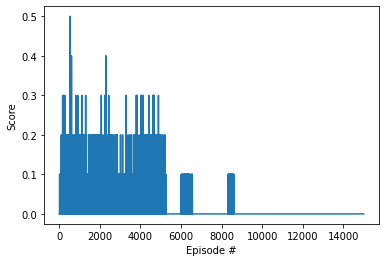


///// Beginning training set  M35.22  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999935
      Noise scale      = 0.049
      LR actor         = 0.000049
      LR critic        = 0.000026
      Learning every      3  time steps
      Learn iterations =  4
      Tau              = 0.00241
      Seed             =  44939
2000	Average score:   0.015,        mem:   1861/   356 (19.1%), avg 1.0 eps/min; ???   
4000	Average score:   0.021,        mem:   3723/   789 (21.2%), avg 1.0 eps/min; ???   
5364	Running avg/max: 0.015/0.200,  mem:   5000/  1078 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   5909/  1078 (18.2%), avg 452.6 eps/min;  0.3 hr rem   
6225	Running avg/max: 0.000/0.000,  mem:   6257/  1078 (17.2%), avg 445.2 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8830/  1078 (12.2%), avg 441.0 eps/min

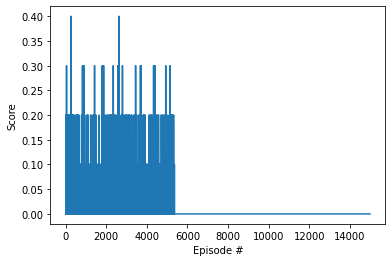


///// Beginning training set  M35.23  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999987
      Noise scale      = 0.044
      LR actor         = 0.000045
      LR critic        = 0.000002
      Learning every      9  time steps
      Learn iterations =  4
      Tau              = 0.00236
      Seed             =  44939
2000	Average score:   0.017,        mem:   1895/   349 (18.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.023,        mem:   3745/   767 (20.5%), avg 1.0 eps/min; ???   
5288	Running avg/max: 0.019/0.300,  mem:   4999/  1074 (21.5%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
5838	Running avg/max: 0.000/0.000,  mem:   5800/  1076 (18.6%), avg 797.8 eps/min    

In [ ]:
# This cell will explore several combinations of hyperparams by training all of them
# Use a random search for the hyperparams

EXPLORE = True

TIME_STEPS         = 400
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX        = "M35"
    EPISODES          = 15001
    NUM_RUNS          = 30
    BAD_STEP_PROB     = 0.1
    BUFFER_PRIME_SIZE = 5000
    WEIGHT_DECAY      = 0.0 #was 1.0e-5
    GAMMA             = 0.99
    SEED              = 44939 #(0, 111, 468, 5555, 23100, 44939)
    
    # session variables:
    vars = [
            ["continuous-float", 0.15,     0.23],     #BAD_STEP_PROB
            ["continuous-float", 0.999924, 0.999999], #NOISE_DECAY
            ["continuous-float", 0.036,    0.054],    #NOISE_SCALE
            ["continuous-float", 0.000010, 0.000080], #LR_ACTOR
            ["continuous-float", 0.000001, 0.000030], #LR_CRITIC
            ["continuous-int",   1,        10],      #LEARN_EVERY
            ["continuous-int",   1,        5],        #LEARN_ITER
            ["continuous-float", 0.00174,  0.00262],  #TAU
            ["discrete",         128, 256]            #BATCH
           ]
    rs = RandomSampler(vars)
    
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, NUM_RUNS, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
    print("    Buf prime size= ", BUFFER_PRIME_SIZE)
            
    for set_id in range(NUM_RUNS):
        
        # sample the variables
        v = rs.sample()
        #BAD_STEP_PROB = v[0]
        NOISE_DECAY   = v[1]
        NOISE_SCALE   = v[2]
        LR_ACTOR      = v[3]
        LR_CRITIC     = v[4]
        LEARN_EVERY   = v[5]
        LEARN_ITER    = v[6]
        TAU           = v[7]
        BATCH         = v[8]

        # set the replay buffer size to that it fills after ~5000 bad episodes
        # (at ~14 experiences/episode), based on the bad step retention rate
        #buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))
        buffer_size = 100000

        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
        print("\n///// Beginning training set ", RUN_NAME, " with:")
        print("      Batch size       = {:d}".format(BATCH))
        print("      Buffer size      = {:d}".format(buffer_size))
        print("      Bad step prob    = {:.4f}".format(BAD_STEP_PROB))
        print("      Noise decay      = {:.6f}".format(NOISE_DECAY))
        print("      Noise scale      = {:.3f}".format(NOISE_SCALE))
        print("      LR actor         = {:.6f}".format(LR_ACTOR))
        print("      LR critic        = {:.6f}".format(LR_CRITIC))
        print("      Learning every     ", LEARN_EVERY, " time steps")
        print("      Learn iterations = ", LEARN_ITER)
        print("      Tau              = {:.5f}".format(TAU))
        print("      Seed             = ", SEED)

        ##### instantiate the agents and perform the training

        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                        noise_decay=NOISE_DECAY, buffer_prime_size=BUFFER_PRIME_SIZE,
                        learn_every=LEARN_EVERY, 
                        learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                        weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                        tau=TAU, model_display_step=MODEL_DISPLAY_STEP)

        scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                       winning_score=0.5, max_time_steps=TIME_STEPS,
                       checkpoint_interval=2000)

        ##### plot the training reward history

        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()

        ##### store the action/noise data, if being used

        if SAVE_ANALYSIS:
            maddpg.save_anal_data(RUN_PREFIX)

                            
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

In [ ]:
# load a pre-trained (or partially trained) model and run it in inference mode to watch it perform

#m = Maddpg(24, 2, 2)
#check = m.restore_checkpoint("checkpoint/", "TEST.00", 20)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

When finished, you can close the environment.

In [ ]:
env.close()